# Movie reviews Classification

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/rev.png" width="1200">



### Problema Classificazione Binaria

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_files

import warnings
warnings.filterwarnings('ignore')

In [10]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip

--2024-05-21 18:50:52--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.194, 52.95.149.18, 3.5.245.136, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781673 (2.7M) [application/octet-stream]
Saving to: ‘txt_sentoken.zip.1’

txt_sentoken.zip.1  100%[===================>]   2.65M  3.28MB/s    in 0.8s    

2024-05-21 18:50:53 (3.28 MB/s) - ‘txt_sentoken.zip.1’ saved [2781673/2781673]



In [11]:
!unzip txt_sentoken.zip

Archive:  txt_sentoken.zip
replace txt_sentoken/neg/cv000_29416.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
movie_data = load_files(r"txt_sentoken")
X_, y = movie_data.data, movie_data.target

In [13]:
df = pd.DataFrame({'text':X_})
df['label'] = y
df

,text,label
0,"b'lisa cholodenko\'s "" high art , "" is an inte...",1
1,"b'wolfgang petersen\'s latest , the perfect st...",0
2,b'i won\x12t even pretend that i have seen the...,0
3,b'there are some works of art that are almost ...,1
4,"b'albert brooks saves the day , just in the ni...",1
...,...,...
1408,"b'hav plenty , as we are told in the beginning...",0
1409,b'brian de palma\'s snake eyes stars nicolas c...,0
1410,b'contact ( pg ) there\'s a moment late in rob...,1
1411,"b""this is a film that i was inclined to like a...",0


In [14]:
## problemi di bytecode
def utfdecode(item):
    cleaned_item = item.decode('utf-8')
    return cleaned_item

df['text'] = df['text'].apply(utfdecode)
df

,text,label
0,"lisa cholodenko's "" high art , "" is an intelli...",1
1,"wolfgang petersen's latest , the perfect storm...",0
2,i wont even pretend that i have seen the othe...,0
3,there are some works of art that are almost im...,1
4,"albert brooks saves the day , just in the nick...",1
...,...,...
1408,"hav plenty , as we are told in the beginning a...",0
1409,brian de palma's snake eyes stars nicolas cage...,0
1410,contact ( pg ) there's a moment late in robert...,1
1411,this is a film that i was inclined to like at ...,0


In [15]:
import re

words_to_remove = ['gargamella', 'doggy', 'word3']
words_pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

patterns = {
            r"[a-zA-Z]+n\'t": 'not',
            r'\s+': ' ',             # Substitute multiple spaces with a single space
            r'\d+': '',              # Remove digits
            r'[^\w\s]': '',          # Remove punctuation and symbols
            r'\b\w{1,2}\b': '',      # Remove all tokens less than 2 characters
            r'(http|www)[^\s]+': '', # Remove websites
            words_pattern: ''        # Remove specific words
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    df[column] = df[column].str.lower() # Apply lowercase transformation
    return df

# solo in preview
df = clean_column(df, 'text', patterns)
df

,text,label
0,lisa cholodenkos high art intelligent qu...,1
1,wolfgang petersens latest the perfect storm ...,0
2,wont even pretend that have seen the other ...,0
3,there are some works art that are almost impo...,1
4,albert brooks saves the day just the nick t...,1
...,...,...
1408,hav plenty are told the beginning and remi...,0
1409,brian palmas snake eyes stars nicolas cages e...,0
1410,contact theres moment late robert zemecki...,1
1411,this film that was inclined like the outs...,0


In [16]:
df['label'].value_counts()

label
0    999
1    414
Name: count, dtype: int64

In [19]:
df['label'].value_counts(normalize=True)

label
0    0.707006
1    0.292994
Name: proportion, dtype: float64

### EDA - Wordcloud

In [20]:
pos = df[df['label']==1]
neg = df[df['label']==0]

In [21]:
text_pos = ' '.join(pos['text'])
text_neg = ' '.join(neg['text'])

(-0.5, 799.5, 399.5, -0.5)

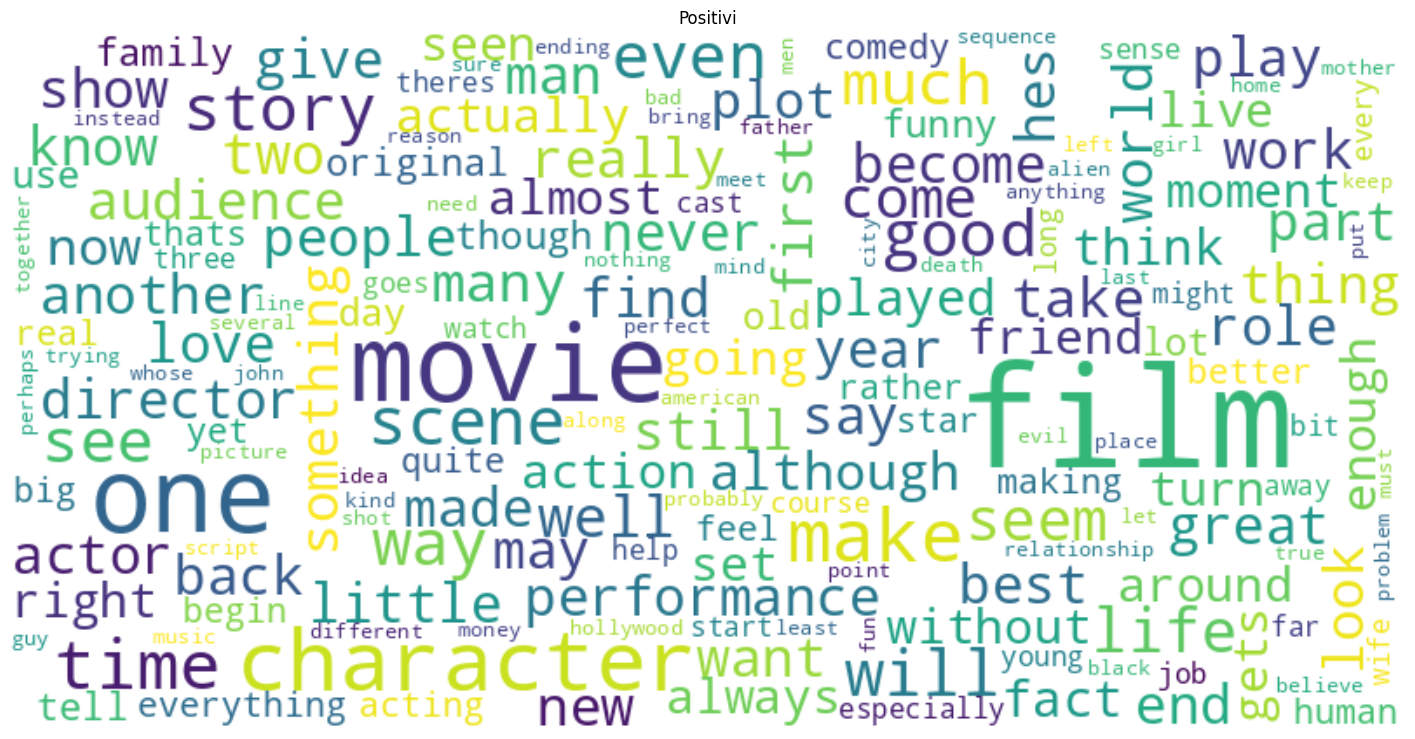

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_pos)

plt.figure(figsize=(18,10))
plt.title('Positivi')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

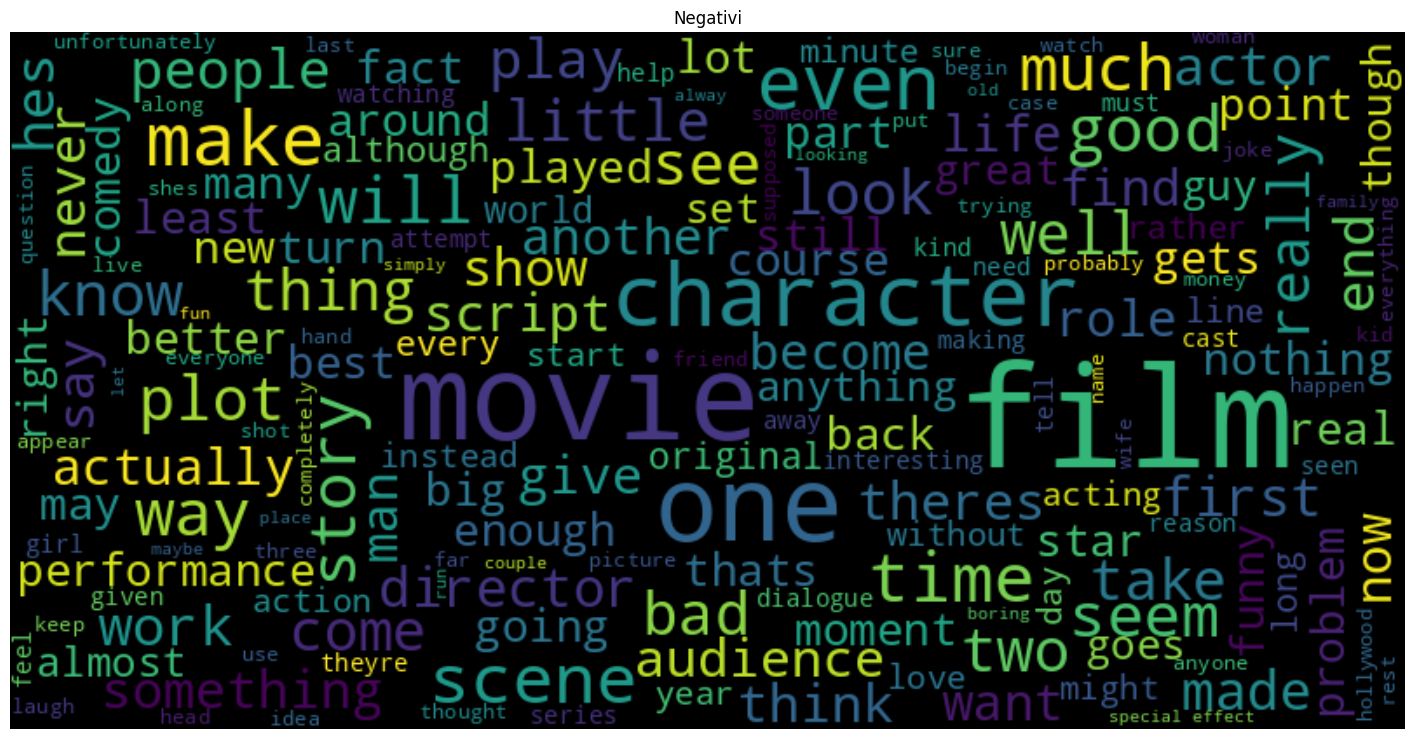

In [23]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_neg)

plt.figure(figsize=(18,10))
plt.title('Negativi')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

molto simili come tokens!!!!!!!! sarà un problema in classificazione

## Features


In [24]:
X = df['text']
y = df['label']

## BoW

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/bow.png" width=1200>

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.



In [25]:
##STEP 4: BoW
from sklearn.feature_extraction.text import CountVectorizer

#bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
bow = CountVectorizer(max_features=15000,stop_words='english')
X_bow = bow.fit_transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TF-IDF
he TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".The term frequency is calculated as:

- Term frequency = (Number of Occurrences of a word)/(Total words in the document)

- IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

In [26]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_bow).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.2,
                                                    random_state=667
                                                    )

In [28]:
##STEP 7: Modellazione
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier_nb = MultinomialNB(alpha=0.1)
classifier_nb.fit(X_train, y_train)

# accuracy score on the test data
y_pred = classifier_nb.predict(X_test)
accuracy_score(y_pred, y_test)

0.7597173144876325

In [29]:
labels = ['Neg', 'Pos']

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

         Neg       0.75      0.99      0.85       202
         Pos       0.84      0.20      0.32        81

    accuracy                           0.76       283
   macro avg       0.80      0.59      0.59       283
weighted avg       0.78      0.76      0.70       283



In [30]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf'),
               XGBClassifier()
               ]

In [39]:
for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

### ConfusionMatrix

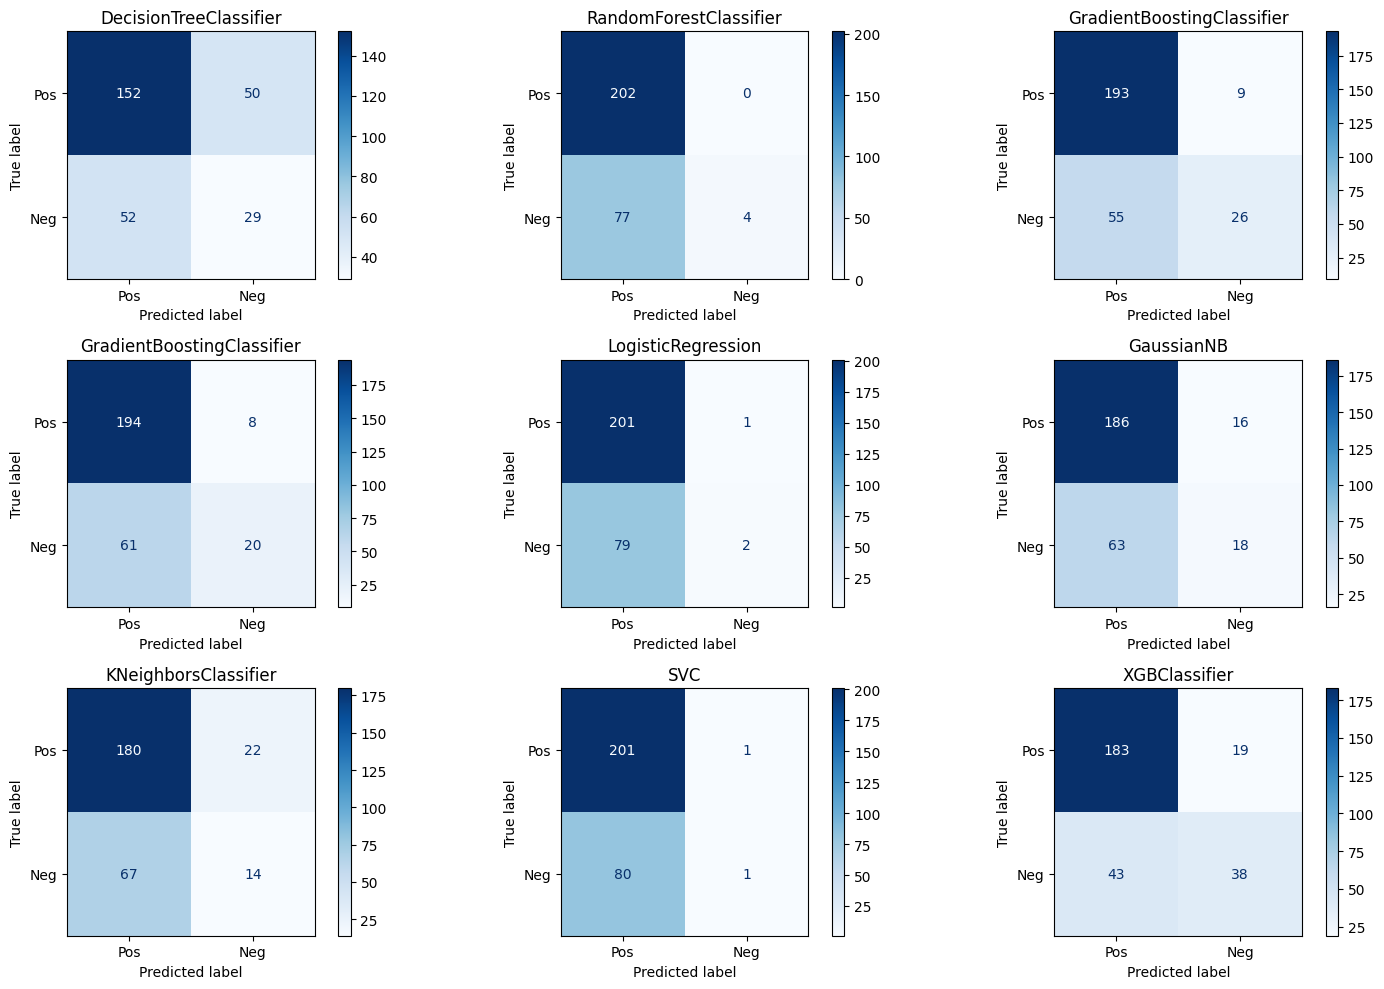

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

labels = ['Pos','Neg']
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            display_labels=labels,
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
#plt.show()

In [34]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test),target_names=labels))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

         Pos       0.75      0.75      0.75       202
         Neg       0.38      0.37      0.37        81

    accuracy                           0.64       283
   macro avg       0.56      0.56      0.56       283
weighted avg       0.64      0.64      0.64       283

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

         Pos       0.72      1.00      0.84       202
         Neg       1.00      0.05      0.09        81

    accuracy                           0.73       283
   macro avg       0.86      0.52      0.47       283
weighted avg       0.80      0.73      0.63       283

GradientBoostingClassifier()
              precision    recall  f1-score   support

         Pos       0.78      0.95      0.85       202
         Neg       0.70      0.32      0.44        81

    accuracy                           0.77       283
   m

### ROC CURVE - AUC

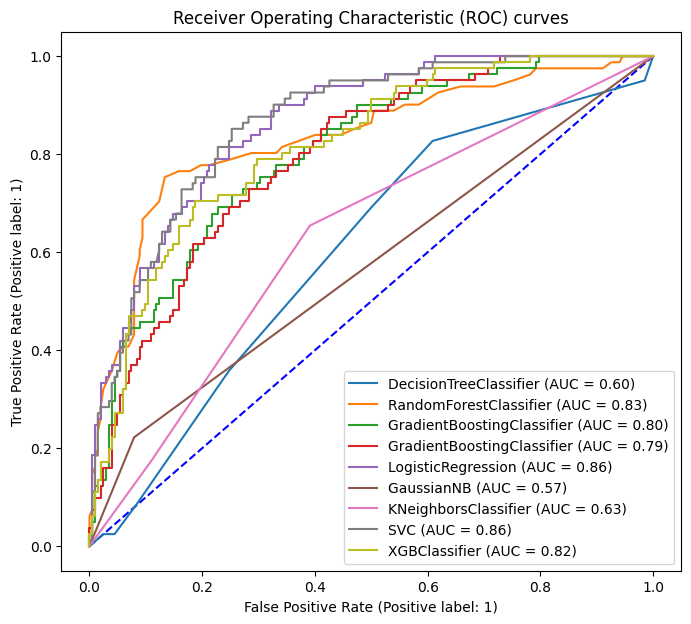

In [41]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# Train the models and record the results
plt.figure(figsize=(8,7))
ax = plt.gca()
plt.plot([0,1],[0,1],'--b')

for cls in classifiers:
    y_score =cls.predict_proba(X_test)[:, 1]
    auc_model = roc_auc_score(y_test,y_score)

    RocCurveDisplay.from_estimator(cls, X_test, y_test, label=f'{cls.__class__.__name__} (AUC = {auc_model:.2f})', ax=ax)
    plt.title("Receiver Operating Characteristic (ROC) curves")
    plt.legend(loc=4)

#### Fine Tune Model with CrossValidation and GridSearch

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'n_estimators': [100],        # numero di alberi
            'max_depth': [3, 4],          # profondità massima degli alberi
            'learning_rate': [0.01],      # tasso di apprendimento
            'subsample': [0.8, 1.0],      # frazione di campioni da usare per l'addestramento
            'colsample_bytree': [0.8],    # frazione di caratteristiche da usare per albero
            #'gamma': [0, 0.1, 0.2]       # parametro di regolarizzazione
            }

xgb = XGBClassifier(random_state=667)
grid_search_xgb = GridSearchCV(estimator = xgb,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2
                            )

In [ ]:
# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 1.0}

In [ ]:
## Put these parameters inside the final Pipeline!!